# Úvod

Tento dataset si klade za cíl analyzovat veřejné preference mezi dvěma typy oblíbenými destinacemi dovolené: horami a plážemi. Poskytuje přehled o různých demografických a životních faktorech, které mohou ovlivnit tyto preference. Prozkoumáním tohoto datasetu mohou uživatelé aplikovat různé techniky strojového učení k predikci, zda jednotlivci preferují hory nebo pláže na základě jejich vlastností.

Odkaz na dataset: [Mountains vs Beaches Preferences](https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference)

# Načtení knihoven

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explorační analýza dat (Exploratory Data Analysis - EDA)

## Datový slovník

| **Pojem**                  | **Popis**                                  | **Typ**                                                |
|:---------------------------|:-------------------------------------------|:-------------------------------------------------------|
| **Age**                    | Věk jednotlivce                            | Numerický                                              |
| **Gender**                 | Genderová identita jednotlivce             | Kategorický: muž, žena, nebinární                      |
| **Income**                 | Roční příjem jednotlivce                   | Numerický                                              |
| **Education Level**        | Nejvyšší dosažené vzdělání                 | Kategorický: střední škola, bakalář, magistr, doktorát |
| **Travel Frequency**       | Počet dovolených za rok                    | Numerický                                              |
| **Preferred Activities**   | Aktivity preferované během dovolené        | Kategorický: turistika, plavání, lyžování, opalování   |
| **Vacation Budget**        | Rozpočet vyhrazený na dovolené             | Numerický                                              |
| **Location**               | Typ bydliště                               | Kategorický: městský, příměstský, venkovský            |
| **Proximity to Mountains** | Vzdálenost k nejbližším horám (v mílích)   | Numerický                                              |
| **Proximity to Beaches**   | Vzdálenost k nejbližším plážím (v mílích)  | Numerický                                              |
| **Favorite Season**        | Preferované roční období pro dovolenou     | Kategorický: léto, zima, jaro, podzim                  |
| **Pets**                   | Zda jednotlivec vlastní domácí zvířata     | Binární: 0 = Ne, 1 = Ano                               |
| **Environmental Concerns** | Zda jednotlivec má environmentální obavy   | Binární: 0 = Ne, 1 = Ano                               |
| **Preference**             | Preference mezi horami a plážemi           | Binární: 0: Pláže, 1: Hory                             |

## Načtení dat

In [88]:
df = pd.read_csv('../datasets/projects/mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


## Základní informace o datasetu

### Počet záznamů a atributů

In [89]:
print(f"Počet záznamů: {df.shape[0]}\nPočet atributů: {df.shape[1]}")

Počet záznamů: 52444
Počet atributů: 14


In [90]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


### Datové typy atributů

In [91]:
df.dtypes

Age                        int64
Gender                    object
Income                     int64
Education_Level           object
Travel_Frequency           int64
Preferred_Activities      object
Vacation_Budget            int64
Location                  object
Proximity_to_Mountains     int64
Proximity_to_Beaches       int64
Favorite_Season           object
Pets                       int64
Environmental_Concerns     int64
Preference                 int64
dtype: object

#### Numerické atributy

##### Binární atributy

In [92]:
binary_columns = ['Pets', 'Environmental_Concerns', 'Preference']
print("\n".join(binary_columns))

Pets
Environmental_Concerns
Preference


##### Nebinární atributy

In [93]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [column for column in numerical_columns if column not in binary_columns]
print("\n".join(numerical_columns))

Age
Income
Travel_Frequency
Vacation_Budget
Proximity_to_Mountains
Proximity_to_Beaches


S numeryckými atributy můžeme provést následující analýzy:
- Rozdělení hodnot
- Korelace mezi atributy
- Distribuce hodnot
- Normalizace hodnot
- Transformace hodnot

#### Kategorické atributy

In [94]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['male' 'female' 'non-binary']
Education_Level: ['bachelor' 'master' 'high school' 'doctorate']
Preferred_Activities: ['skiing' 'swimming' 'hiking' 'sunbathing']
Location: ['urban' 'suburban' 'rural']
Favorite_Season: ['summer' 'fall' 'winter' 'spring']


V kategorických atributehc nemáme žádné zbytečné hodnoty, které by bylo třeba odstranit. Každý z nich má svůj význam a předpokládame, že budou důležité pro analýzu. Další zpracování bude zahrnuto v dalších krocích.

### Chybějící hodnoty

In [95]:
missing_values = int(df.isnull().sum().sum())
missing_values

0

Paráda, v datasetu nejsou žádné chybějící hodnoty.

### Duplicitní záznamy

In [96]:
duplicates = int(df.duplicated().astype(int).sum())
duplicates

0

Skvělé, v datasetu nejsou ani žádné duplicitní záznamy.

## Vizualizace dat

### Distribuce kategorických atributů

In [97]:
def plot_summary_categorical(_df, _column):
    print(pd.DataFrame({"Počet záznamů": _df[_column].value_counts(),
                        "Podíl záznamů (%)": _df[_column].value_counts(normalize=True) * 100}))

    values = _df[_column].value_counts()
    colors = sns.color_palette("viridis", len(values))

    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    sns.countplot(data=_df, x=_df[_column], hue=_df[_column], palette=colors, legend=False)
    plt.title(f"Počet záznamů pro kategorický atribut: {_column}")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(x=values, labels=values.index, autopct="%.1f%%", startangle=90, colors=colors)
    plt.title(f"Podíl záznamů pro kategorický atribut: {_column}")

    plt.legend()
    plt.show()

            Počet záznamů  Podíl záznamů (%)
Gender                                      
female              17638          33.632065
male                17522          33.410876
non-binary          17284          32.957059


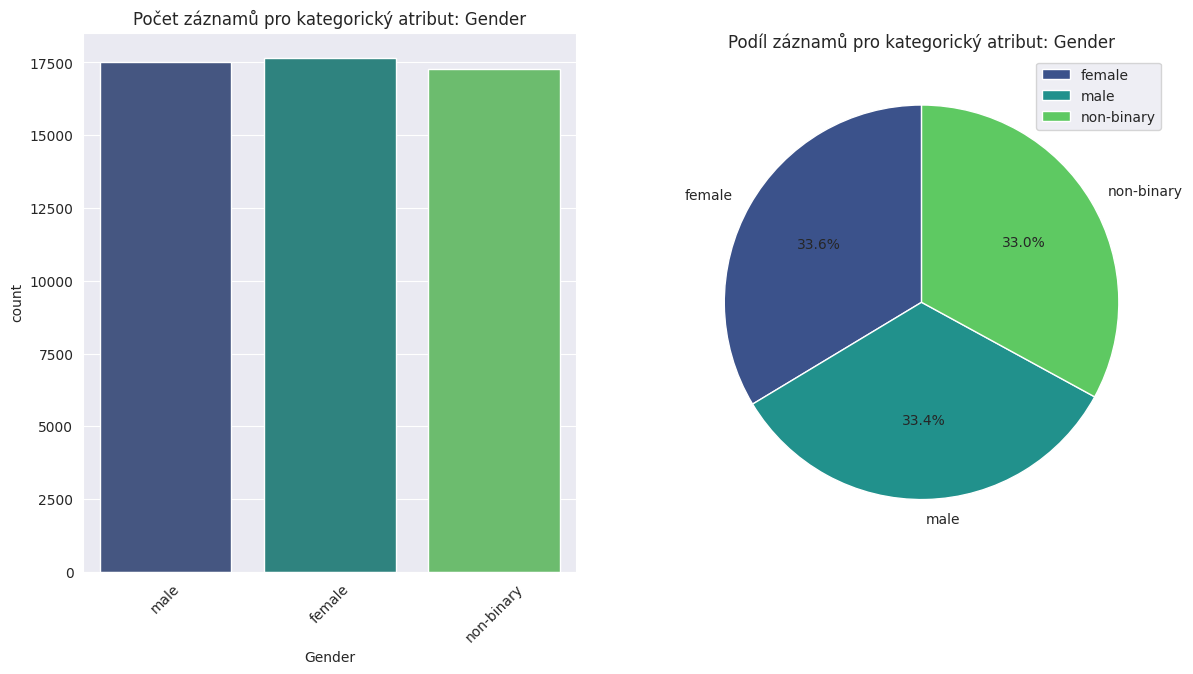

                 Počet záznamů  Podíl záznamů (%)
Education_Level                                  
doctorate                13293          25.347037
bachelor                 13127          25.030509
high school              13072          24.925635
master                   12952          24.696819


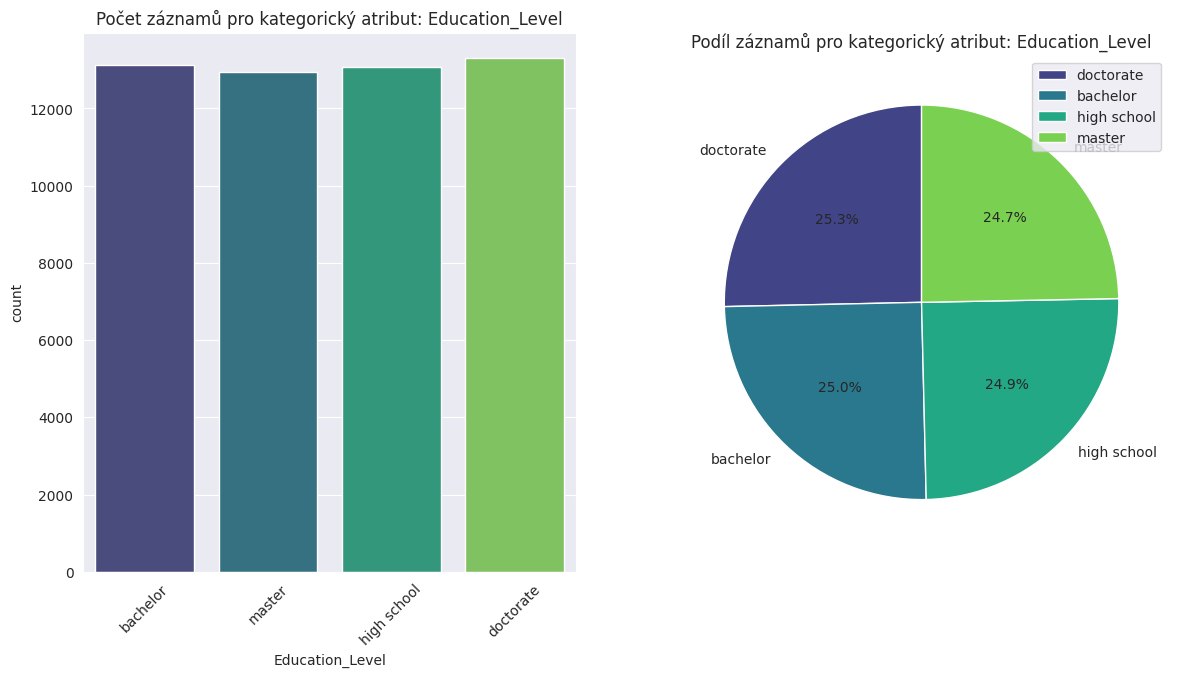

                      Počet záznamů  Podíl záznamů (%)
Preferred_Activities                                  
sunbathing                    13221          25.209748
skiing                        13167          25.106781
hiking                        13102          24.982839
swimming                      12954          24.700633


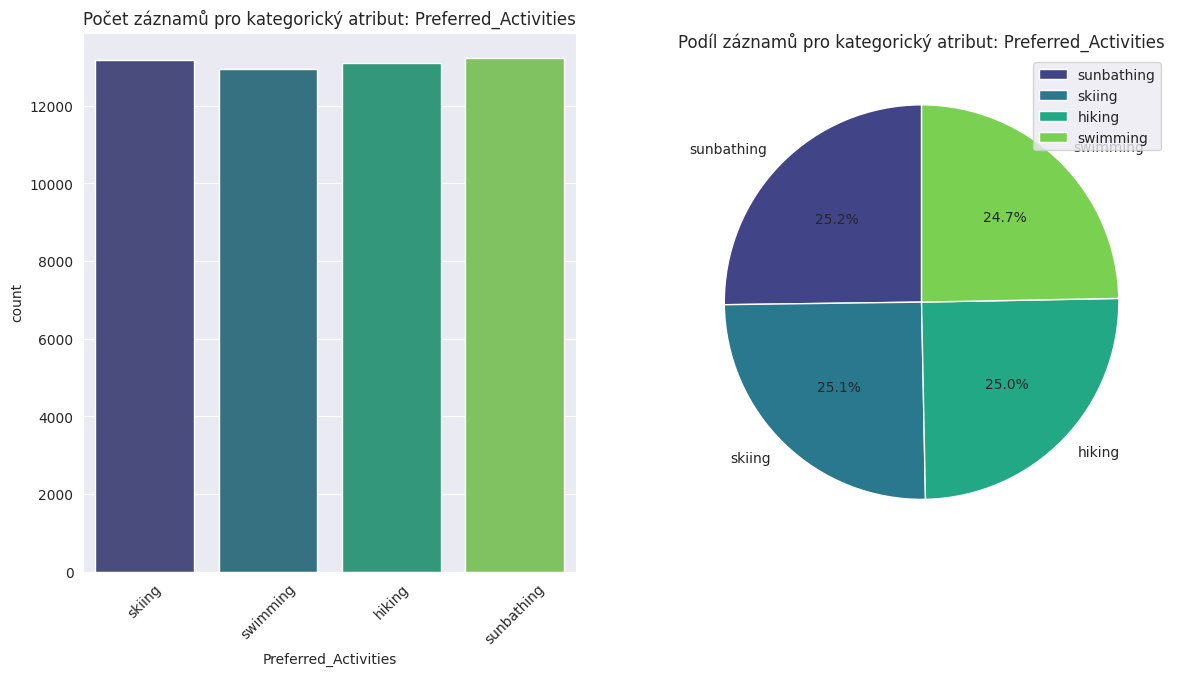

          Počet záznamů  Podíl záznamů (%)
Location                                  
suburban          17503          33.374647
urban             17476          33.323164
rural             17465          33.302189


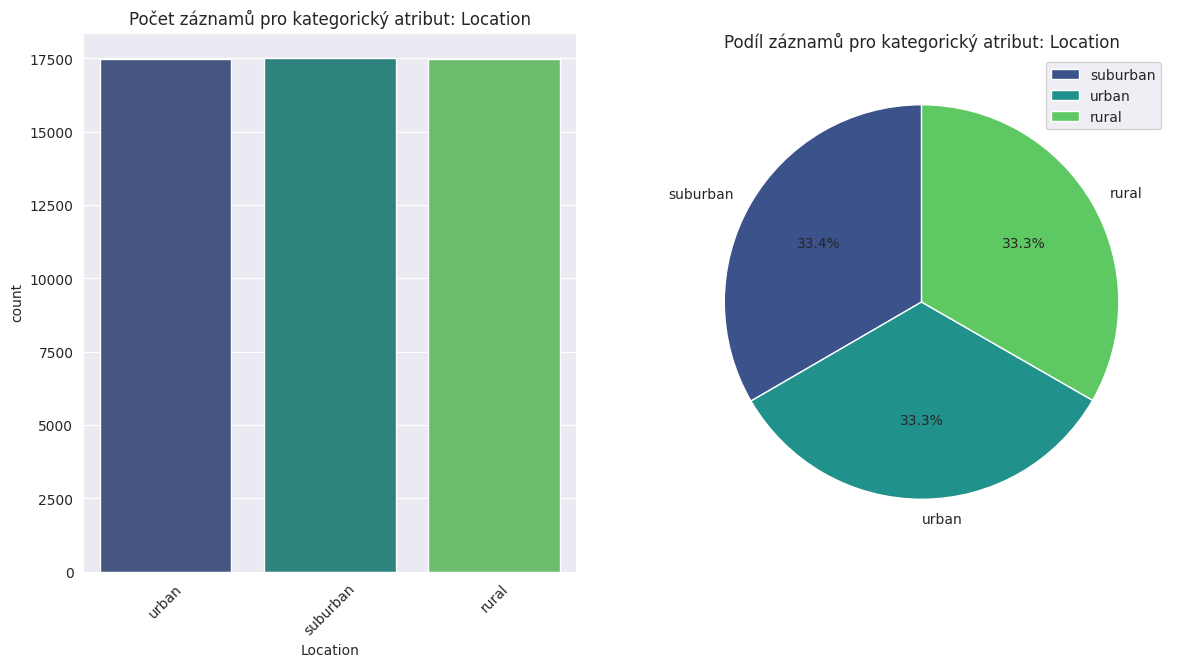

                 Počet záznamů  Podíl záznamů (%)
Favorite_Season                                  
summer                   13303          25.366105
fall                     13170          25.112501
winter                   13019          24.824575
spring                   12952          24.696819


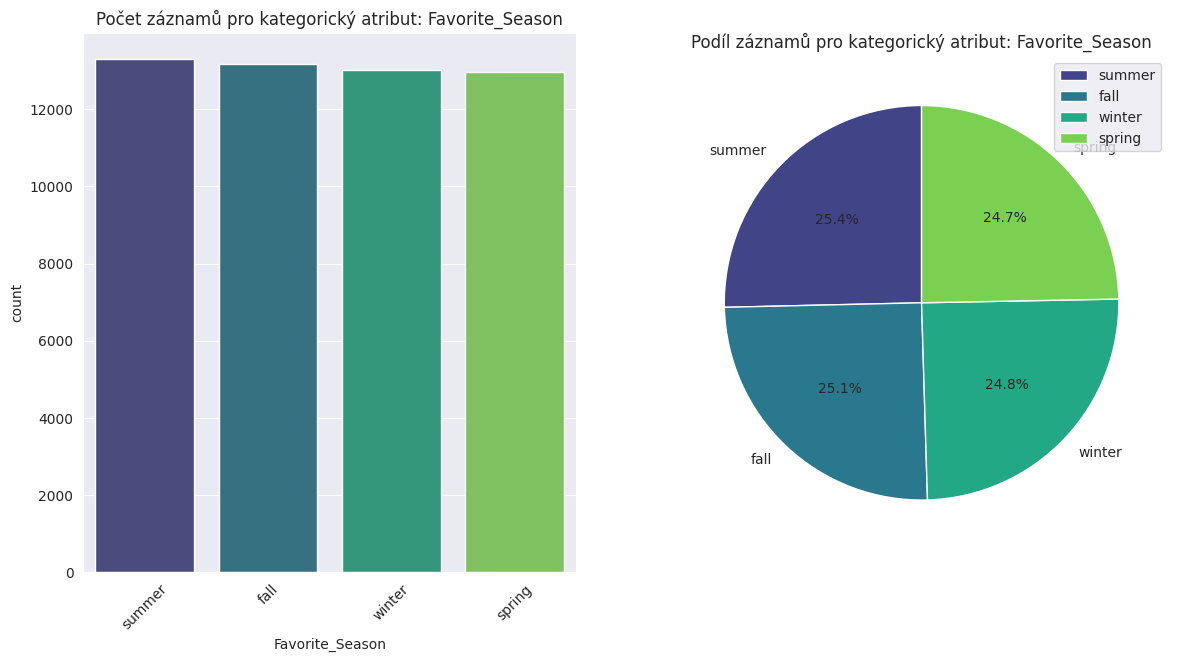

In [98]:
for column in categorical_columns:
    plot_summary_categorical(df, column)

### Distribuce numerických atributů

In [99]:
def plot_summary_numerical(_df, _column):
    plt.figure(figsize=(14, 7))

    mean = _df[_column].mean()
    median = _df[_column].median()

    plt.subplot(1, 2, 1)
    sns.histplot(data=_df, x=_column, kde=True)
    plt.title(f"Distribuce hodnot pro numerický atribut: {_column}")
    # put the median and mean values on the plot and show the legend on the left
    plt.axvline(mean, color='r', linestyle='--', label=f"Průměr: {mean:.2f}")
    plt.axvline(median, color='g', linestyle='--', label=f"Medián: {median:.2f}")
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=_df, x=_column)
    plt.title(f"Boxplot pro numerický atribut: {_column}")

    plt.show()

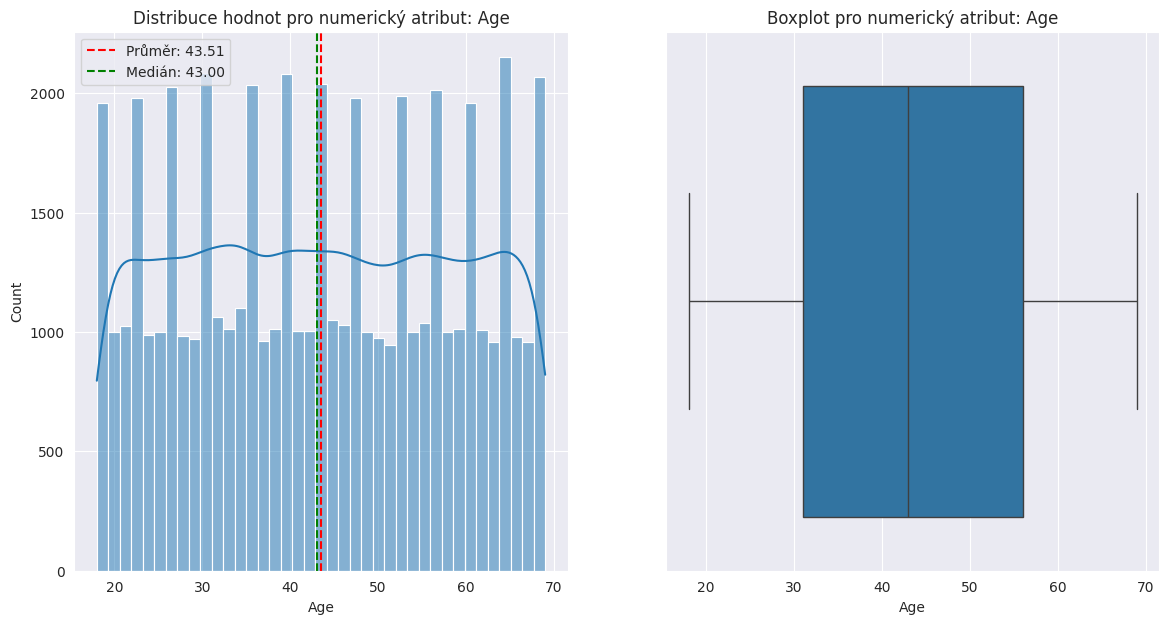

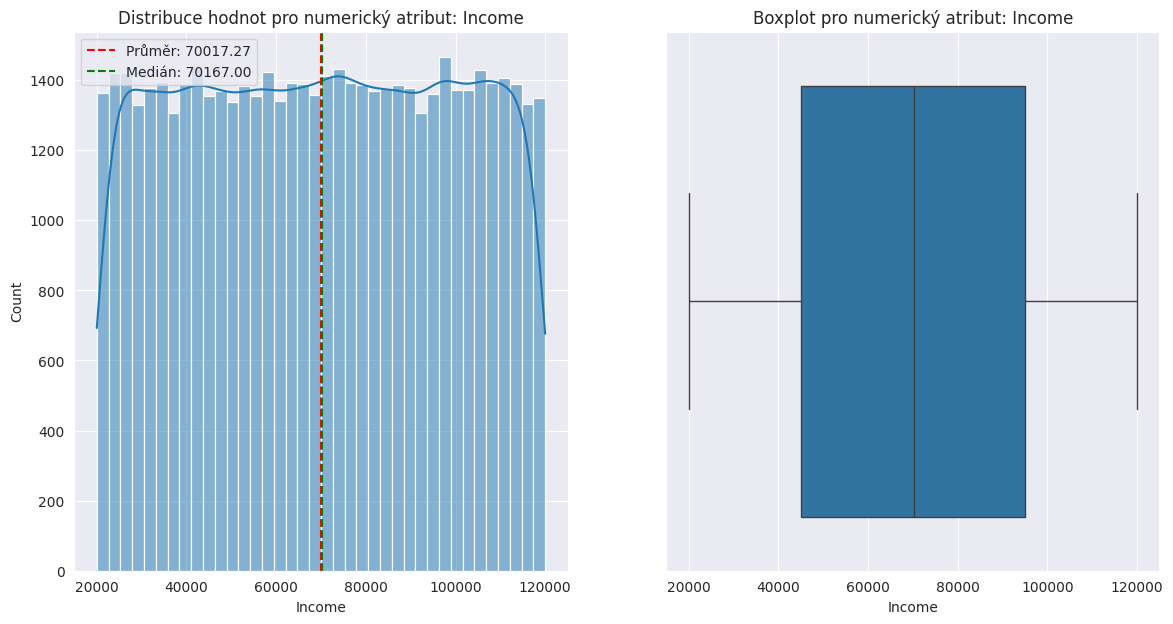

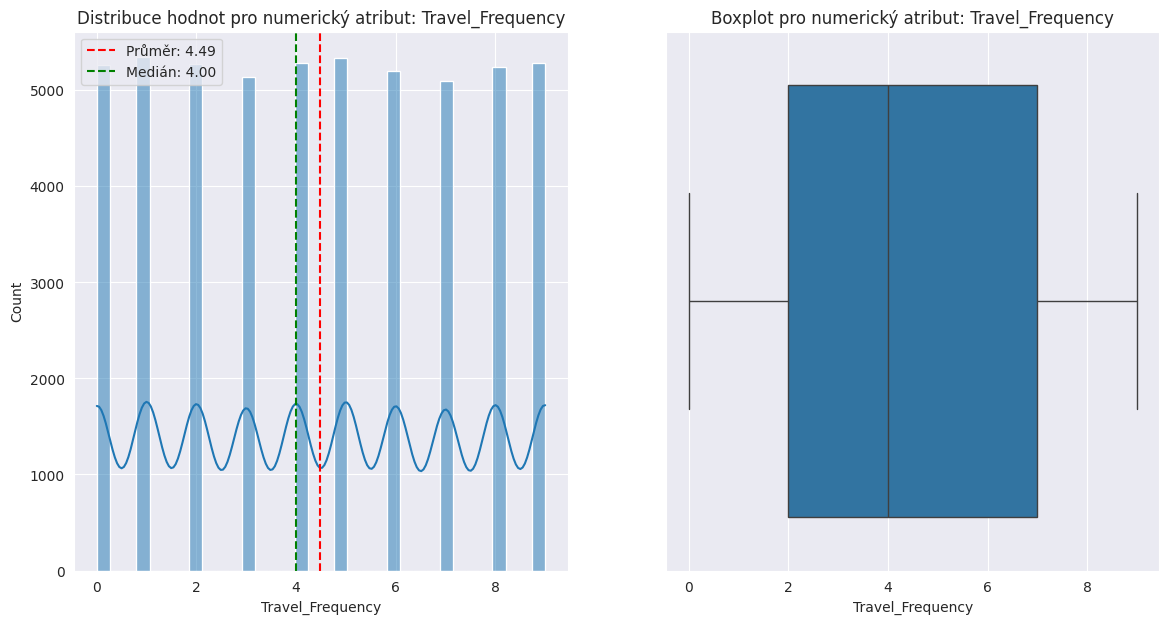

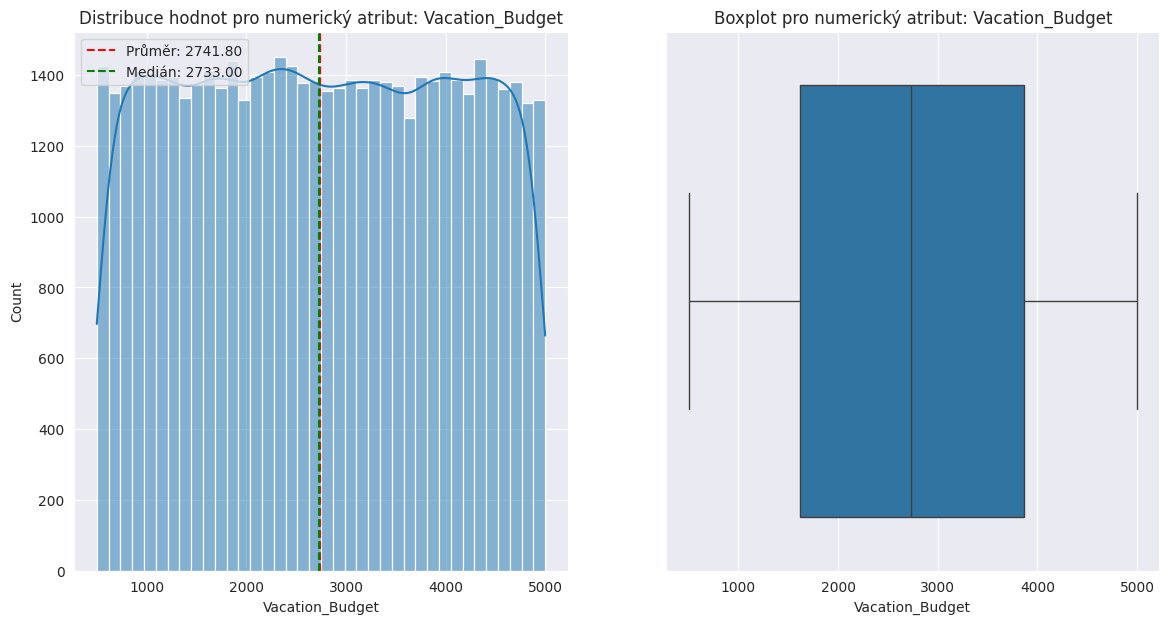

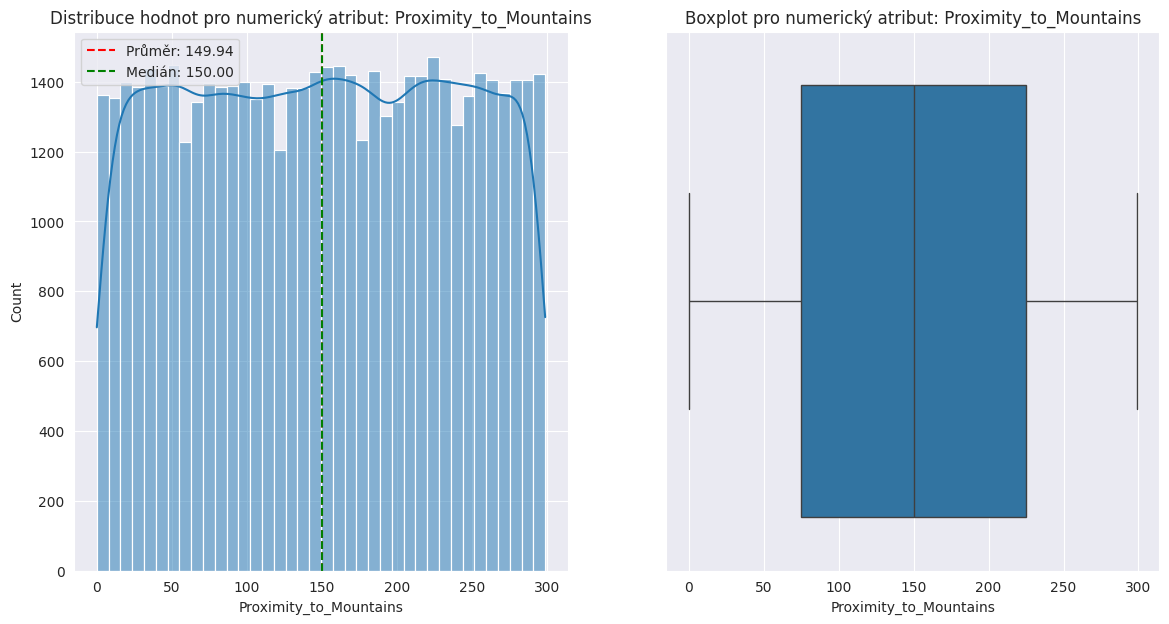

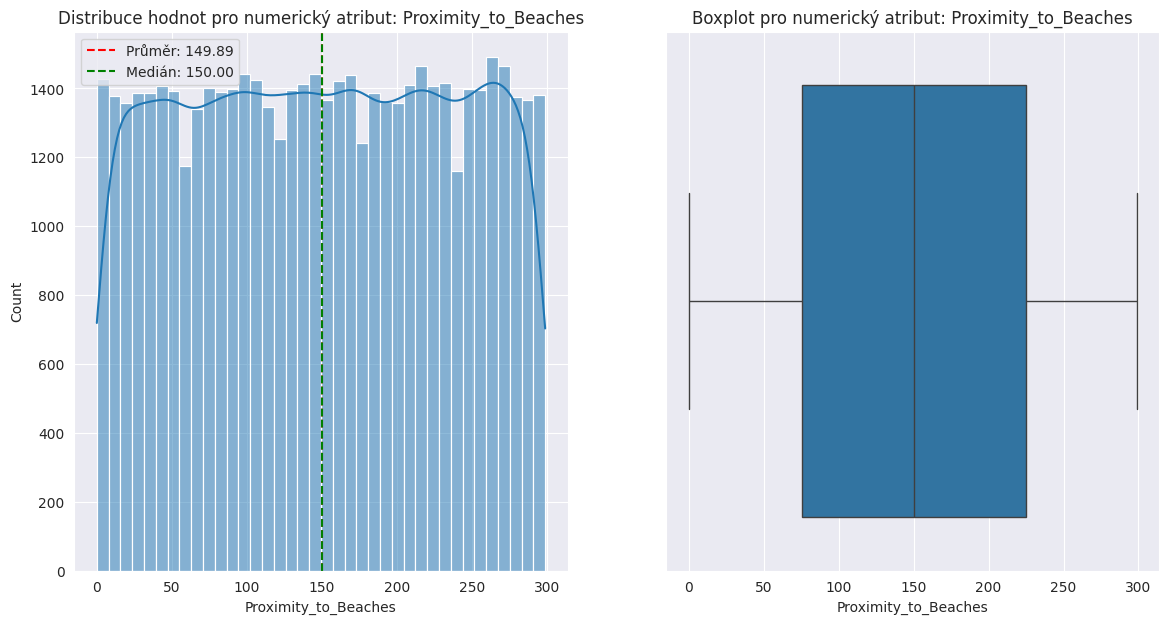

In [100]:
for column in numerical_columns:
    plot_summary_numerical(df, column)

### Vizaulizace binárních atriutů

      Počet záznamů  Podíl záznamů (%)
Pets                                  
1             26267          50.085806
0             26177          49.914194


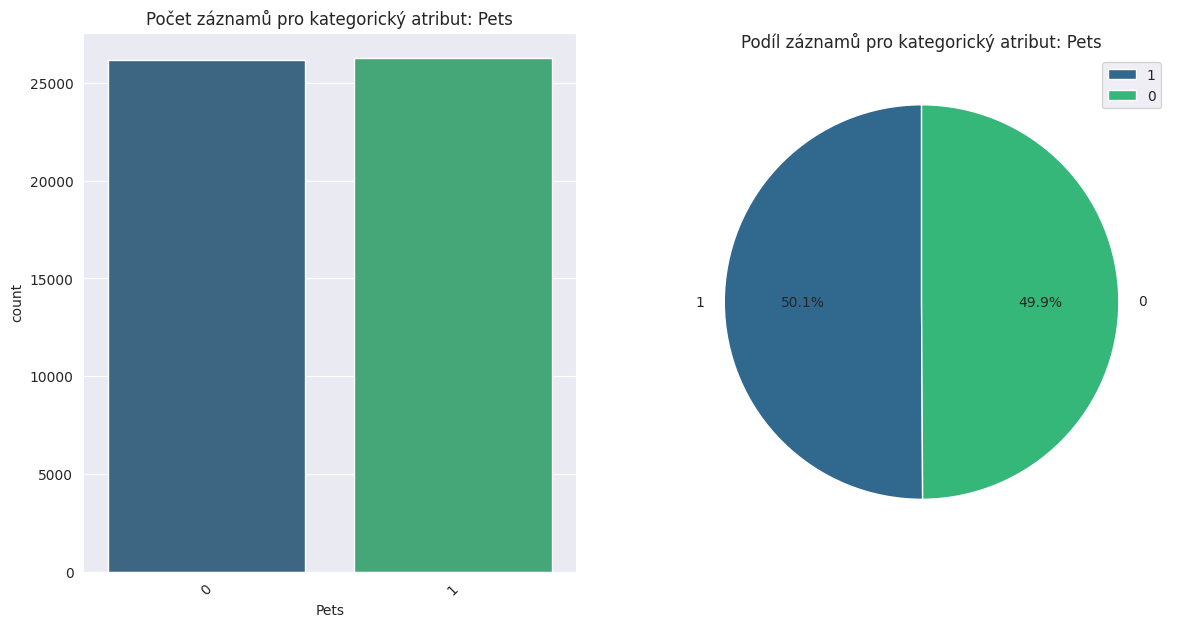

                        Počet záznamů  Podíl záznamů (%)
Environmental_Concerns                                  
0                               26304          50.156357
1                               26140          49.843643


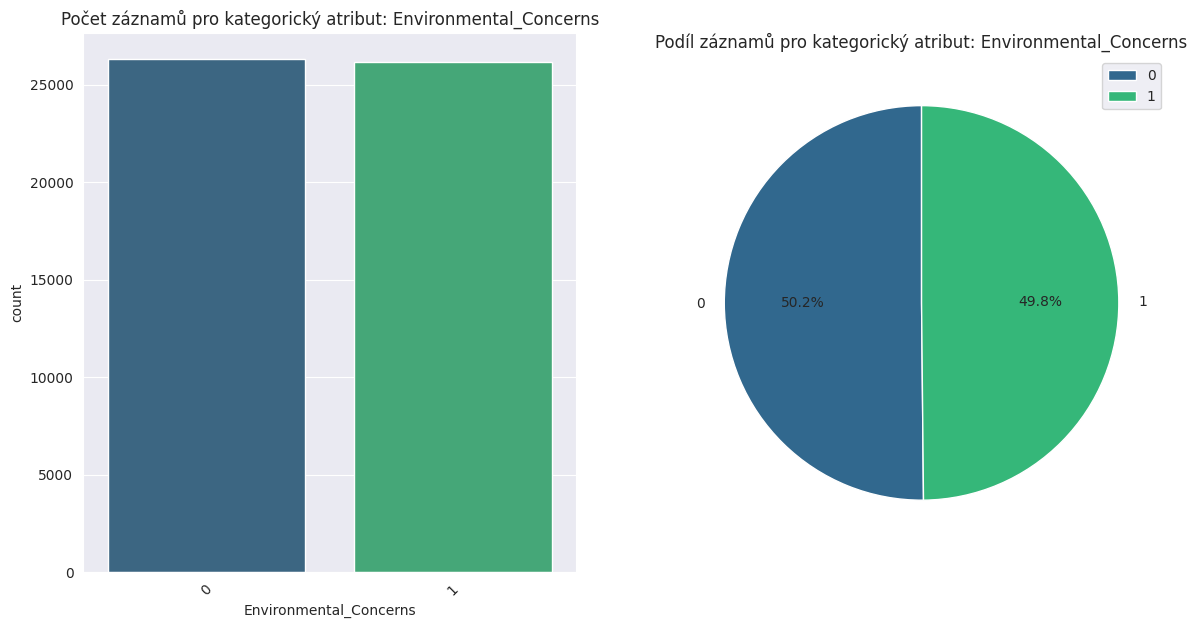

            Počet záznamů  Podíl záznamů (%)
Preference                                  
0                   39296          74.929449
1                   13148          25.070551


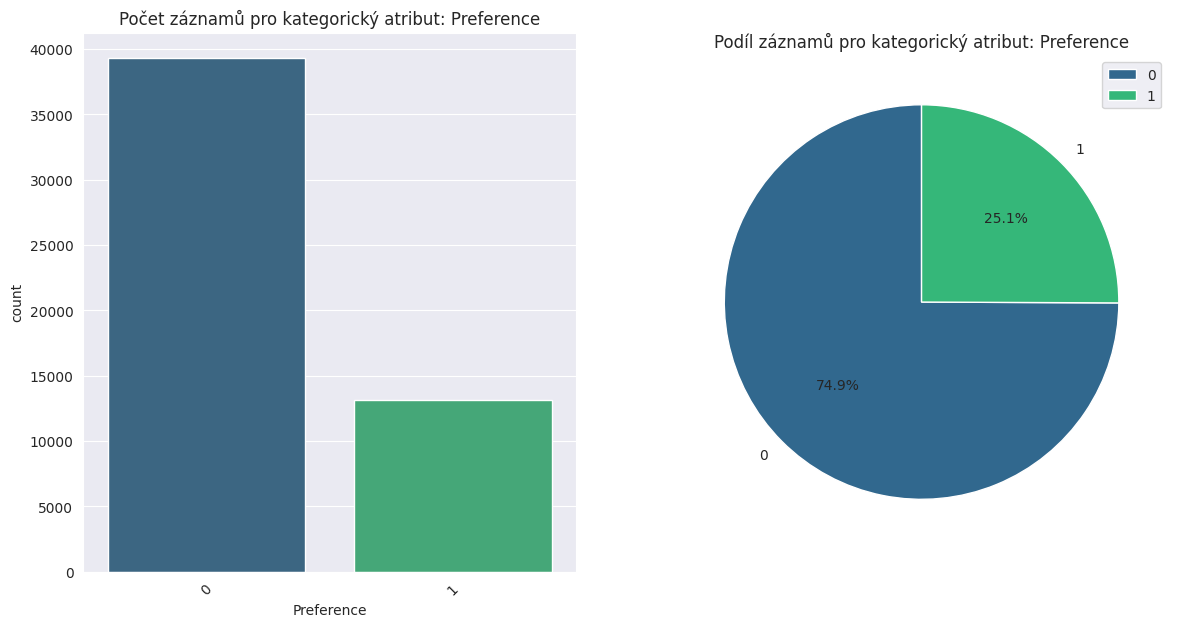

In [101]:
for column in binary_columns:
    plot_summary_categorical(df, column)

# Předzpracování dat

In [102]:
df_copy = df.copy()

## Kódování kategorických atributů

S kategorickými atributy můžeme provést následující operace:
- Pořadové kódování
    - Převod kategorických atributů na numerické atributy, kde je ppřirozený pořádek (např. intenzita, velikost, vzálenost)
- One-hot kódování
    - Převod kategorických atributů na binární atributy, kde každá unikátní hodnota je reprezentována jako nový atribut
- Label encoding
    - Převod kategorických atributů na numerické atributy, kde každá unikátní hodnota je reprezentována jako nové číslo

### Transformace kategorických atributů

In [103]:
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['male' 'female' 'non-binary']
Education_Level: ['bachelor' 'master' 'high school' 'doctorate']
Preferred_Activities: ['skiing' 'swimming' 'hiking' 'sunbathing']
Location: ['urban' 'suburban' 'rural']
Favorite_Season: ['summer' 'fall' 'winter' 'spring']


## Pořadové kódování

Úroveň vzdělání je pořadový kategorický atribut, který můžeme převést na numerický atribut pomocí pořadového kódování. Je zde jasné hierchie mezi jednotlivými hodnotami atributů. Vytvoříme slovník, který mapuje jednotlivé úrovně vzdělání na číselné hodnoty.

In [104]:
education_level_mapping = {
    'high school': 0,
    'bachelor': 1,
    'master': 2,
    'doctorate': 3
}

df_copy['Education_Level'] = df_copy['Education_Level'].map(education_level_mapping)
categorical_columns = [column for column in categorical_columns if column != 'Education_Level']

## One-hot kódování

Pro zbývající kategorické atributy použijeme one-hot kódování. Není zde

In [105]:
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['male' 'female' 'non-binary']
Preferred_Activities: ['skiing' 'swimming' 'hiking' 'sunbathing']
Location: ['urban' 'suburban' 'rural']
Favorite_Season: ['summer' 'fall' 'winter' 'spring']


In [106]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df_copy and categorical_columns are already defined
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(df_copy[categorical_columns]).toarray()
one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df_copy = pd.concat([df_copy, one_hot_encoded], axis=1)
df_copy.drop(columns=categorical_columns, inplace=True)
print(df_copy.columns)

Index(['Age', 'Income', 'Education_Level', 'Travel_Frequency',
       'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches',
       'Pets', 'Environmental_Concerns', 'Preference', 'Gender_female',
       'Gender_male', 'Gender_non-binary', 'Preferred_Activities_hiking',
       'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
       'Preferred_Activities_swimming', 'Location_rural', 'Location_suburban',
       'Location_urban', 'Favorite_Season_fall', 'Favorite_Season_spring',
       'Favorite_Season_summer', 'Favorite_Season_winter'],
      dtype='object')


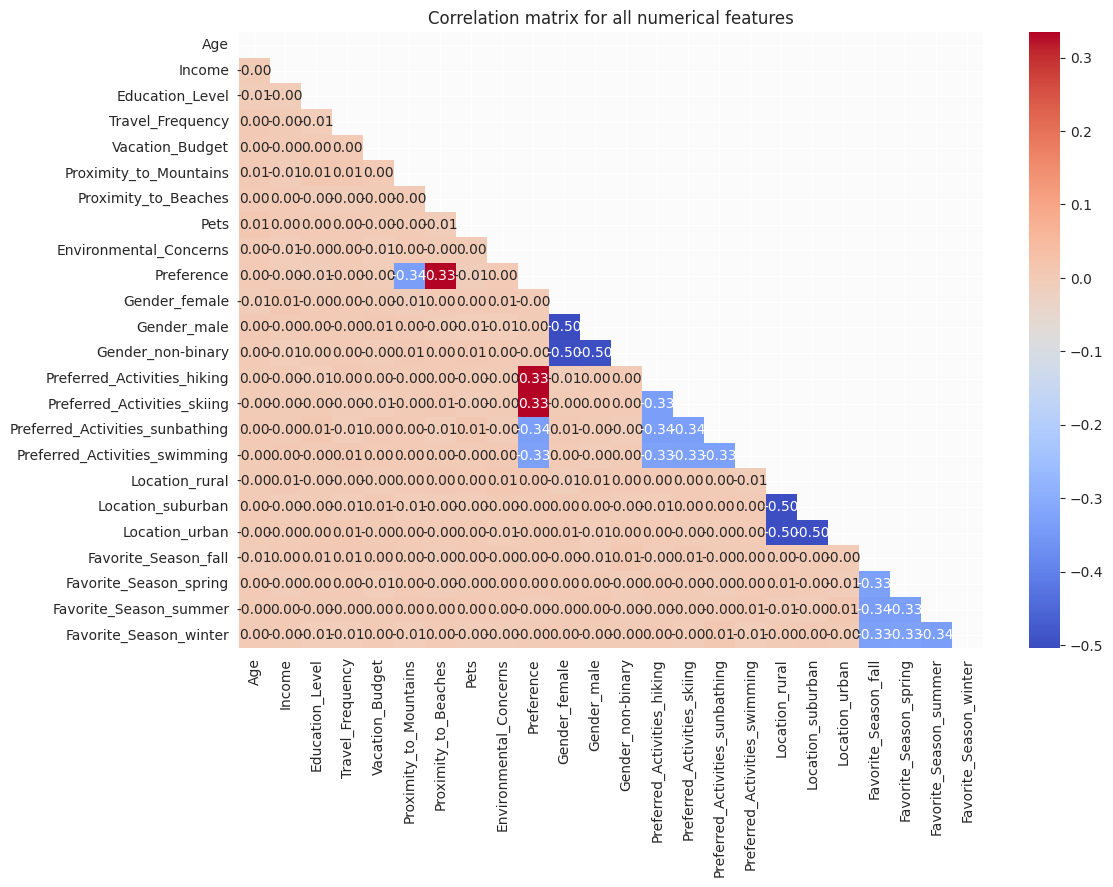

In [115]:
mask = np.triu(np.ones_like(df_copy.corr(), dtype=bool))

plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size": 10})
ax.set_title("Correlation matrix for all numerical features")
ax.set_facecolor("#FBFBFB")

plt.show()

# Shluková analýza

## K-means

In [118]:
clustering_scores = []
clustering_range = range(2, 11)

import sklearn.cluster
from sklearn.cluster import KMeans

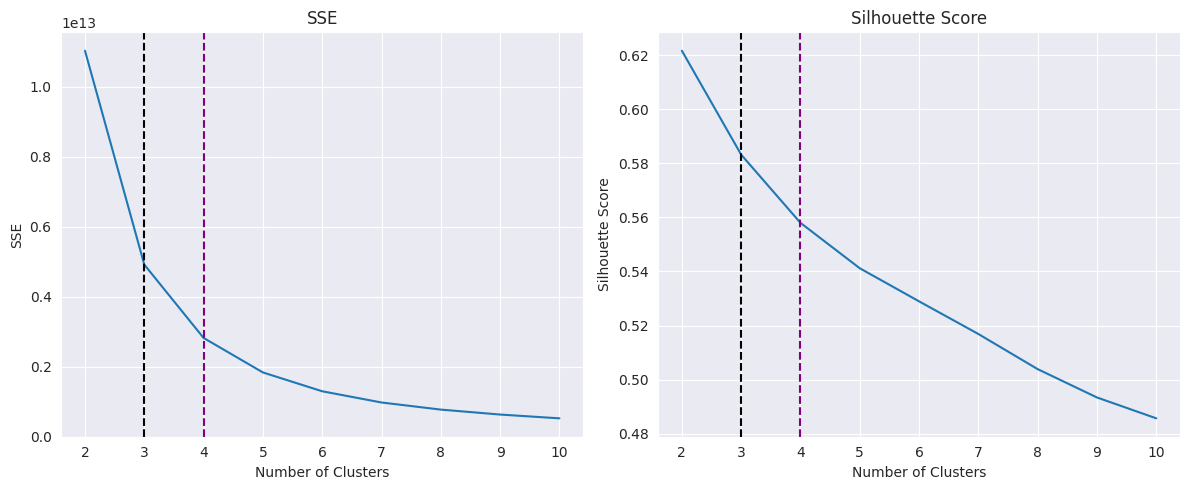

In [119]:
for k in range(2, 11):
    clustering = KMeans(n_clusters=k).fit(df_copy)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(df_copy, clustering.labels_)
    })

df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df_clustering_scores.sse.plot(ax=ax1)
ax1.set_title('SSE')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE')

df_clustering_scores.silhouette.plot(ax=ax2)
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Na grafech je vidět, že optimální počet shluků jsou 3 a 4, podle bodu zlomu "elbow point", které jsou podpořené vysokými hodnota Silhouette Score.

In [121]:
chosen_k = [3, 4]